##HEALTH CARE PROJECT ON THE LENGTH OF HOSPITAL STAY IN INTERNAL MEDICINE

##QUESTION:

Did the patient's gender greatly associate with the length of hospital stay in the second quarter of 2023 in the Department of Internal Medicine?
The hospital stakeholders would like to have the answer to this question before their next meeting in two weeks.

##STEPS IN DATA ANALYTICS:

Problem identification, data identification, data location, data extraction, importing libraries, importing datasets, data cleaning, data manupilation,
data exploratory analysis, data visualization, data analysis(hypothesis testing), interpretation of results, and dissemination of the new knowledge.
For us to answer the question, we need to establish if there is a relationship between LENGTH OF STAY(LOS) AND GENDER.
Mann-Whitney U test or t-test will compare the medians or means of the two variables.
Shapiro test will give guidance on which test to use.
This project presentation will start with importing libraries.

##IMPORT PYTHON LIBRARIES

In [8]:
import pandas as pd
import numpy as np
import scipy as scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

##IMPORT 3 EXCEL FILES CORRESPONDING TO 3 MONTHS

In [11]:
df4 = pd.read_excel(r"C:\Users\SmartCare\OneDrive\Desktop\ANNEE_2023\4.APRIL2023A.xlsx",0)
df4.head()

,DATE_ADMISSION,AGE,SEX,HIV_STATUS,DIAGNOSIS,REFCLINIC,SURVIVED,DIED,DEATH_TIME,OUTCOME,DATE_OUTCOME,HOSPITAL_STAY,DOCTOR
0,2023-04-02,NaN,F,NaN,stroke,Mahatma Ghandi,YES,NO,ALIVE,DISCHARGED,2023-04-13,11.0,Thomas
1,2023-04-04,49.0,F,NEGATIVE,Bronchiectasis,NaN,YES,NO,ALIVE,CARRY-FORWARD,2023-04-30,26.0,Thomas
2,2023-03-22,89.0,F,NEGATIVE,Acute gastroenteritis,NaN,YES,NO,ALIVE,DISCHARGED,2023-04-04,13.0,Thomas
3,2023-03-23,66.0,F,NEGATIVE,Asthma,NaN,YES,NO,ALIVE,DISCHARGED,2023-04-10,18.0,Thomas
4,2023-03-24,35.0,F,NEGATIVE,Diabetes Mellitus,HDU,YES,NO,ALIVE,DISCHARGED,2023-04-06,13.0,Thomas


In [12]:
df5 = pd.read_excel(r"C:\Users\SmartCare\OneDrive\Desktop\ANNEE_2023\5.MAY2023A.xlsx",0)
df5.head()

,DATE_ADMISSION,AGE,SEX,HIV_STATUS,DIAGNOSIS,REFCLINIC,SURVIVED,DIED,DEATH_TIME,OUTCOME,DATE_OUTCOME,HOSPITAL_STAY,DOCTOR
0,2023-05-01,32.0,F,POSITIVE,ANAEMIA,SELF-REFERRAL,YES,NO,ALIVE,DISCHARGED,2023-05-08,7.0,PHIRY_Z
1,2023-05-01,42.0,F,POSITIVE,CKD,SELF-REFERRAL,YES,NO,ALIVE,DISCHARGED,2023-05-08,7.0,PHIRY_Z
2,2023-05-02,40.0,F,NEGATIVE,DYSTONIA,SELF-REFERRAL,YES,NO,ALIVE,DISCHARGED,2023-05-03,1.0,PHIRY_Z
3,2023-05-02,41.0,F,NEGATIVE,HTN,SELF-REFERRAL,YES,NO,ALIVE,DISCHARGED,2023-05-03,1.0,PHIRY_Z
4,2023-05-03,44.0,F,POSITIVE,CLD,mukuni,YES,NO,ALIVE,TRANSOUT,2023-05-12,9.0,PHIRY_Z


In [13]:
df6 = pd.read_excel(r"C:\Users\SmartCare\OneDrive\Desktop\ANNEE_2023\6.JUNE2023.xlsx",0)
df6.head()

,DATE_ADMISSION,AGE,SEX,HIV_STATUS,DIAGNOSIS,REFCLINIC,SURVIVED,DIED,DEATH_TIME,OUTCOME,DATE_OUTCOME,HOSPITAL_STAY,DOCTOR
0,2023-06-01,49,M,NEGATIVE,CKD,Namwala,YES,NO,ALIVE,DISCHARGED,2023-07-01,30.0,Dr Bukasaa
1,2023-06-02,43,M,NEGATIVE,TB,LUTH,NO,YES,<48h,DIED,2023-07-02,30.0,Lukundo
2,2023-06-02,25,M,NaN,ANEMIA,SELF-REFERRAL,YES,NO,ALIVE,DISCHARGED,2023-06-03,1.0,Dr Bukasa
3,2023-06-02,63,M,NaN,BPH,SELF-REFERRAL,YES,NO,ALIVE,TRANSOUT,NaT,NaN,Dr Bukasa
4,2023-06-02,49,M,NEGATIVE,NEUROCYSTICERCOSIS,Choma,YES,NO,ALIVE,DISCHARGED,2023-07-07,35.0,dr Bukasa


##COMBINE BY CONCATENATING 3 SIMILAR STRUCTURED DATAFRAMES IN A SINGLE ONE

In [16]:
df13 = pd.concat([df4,df5,df6],ignore_index=True)
df13.head()

,DATE_ADMISSION,AGE,SEX,HIV_STATUS,DIAGNOSIS,REFCLINIC,SURVIVED,DIED,DEATH_TIME,OUTCOME,DATE_OUTCOME,HOSPITAL_STAY,DOCTOR
0,2023-04-02,NaN,F,NaN,stroke,Mahatma Ghandi,YES,NO,ALIVE,DISCHARGED,2023-04-13,11.0,Thomas
1,2023-04-04,49.0,F,NEGATIVE,Bronchiectasis,NaN,YES,NO,ALIVE,CARRY-FORWARD,2023-04-30,26.0,Thomas
2,2023-03-22,89.0,F,NEGATIVE,Acute gastroenteritis,NaN,YES,NO,ALIVE,DISCHARGED,2023-04-04,13.0,Thomas
3,2023-03-23,66.0,F,NEGATIVE,Asthma,NaN,YES,NO,ALIVE,DISCHARGED,2023-04-10,18.0,Thomas
4,2023-03-24,35.0,F,NEGATIVE,Diabetes Mellitus,HDU,YES,NO,ALIVE,DISCHARGED,2023-04-06,13.0,Thomas


####UNDERSTANDING DATA IN DEPTH

In [19]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE_ADMISSION  527 non-null    datetime64[ns]
 1   AGE             500 non-null    float64       
 2   SEX             521 non-null    object        
 3   HIV_STATUS      458 non-null    object        
 4   DIAGNOSIS       511 non-null    object        
 5   REFCLINIC       382 non-null    object        
 6   SURVIVED        511 non-null    object        
 7   DIED            514 non-null    object        
 8   DEATH_TIME      527 non-null    object        
 9   OUTCOME         521 non-null    object        
 10  DATE_OUTCOME    496 non-null    datetime64[ns]
 11  HOSPITAL_STAY   496 non-null    float64       
 12  DOCTOR          527 non-null    object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 53.7+ KB


In [20]:
df13.shape

(527, 13)

In [22]:
df13['SEX'].unique()

array(['F', 'M', nan], dtype=object)

In [23]:
 df13['SEX'].value_counts() 

SEX
F    265
M    256
Name: count, dtype: int64

In [26]:
df13.columns

Index(['DATE_ADMISSION', 'AGE', 'SEX', 'HIV_STATUS', 'DIAGNOSIS', 'REFCLINIC',
       'SURVIVED', 'DIED', 'DEATH_TIME', 'OUTCOME', 'DATE_OUTCOME',
       'HOSPITAL_STAY', 'DOCTOR'],
      dtype='object')

##DATA CLEANING

###DEALING WITH REDUNDANT DATA

####IDENTIFYING DUPLICATED DATA

In [37]:
df13.duplicated()
df13.head()

,DATE_ADMISSION,AGE,SEX,HIV_STATUS,DIAGNOSIS,REFCLINIC,SURVIVED,DIED,DEATH_TIME,OUTCOME,DATE_OUTCOME,HOSPITAL_STAY,DOCTOR
0,2023-04-02,NaN,F,NaN,stroke,Mahatma Ghandi,YES,NO,ALIVE,DISCHARGED,2023-04-13,11.0,Thomas
1,2023-04-04,49.0,F,NEGATIVE,Bronchiectasis,NaN,YES,NO,ALIVE,CARRY-FORWARD,2023-04-30,26.0,Thomas
2,2023-03-22,89.0,F,NEGATIVE,Acute gastroenteritis,NaN,YES,NO,ALIVE,DISCHARGED,2023-04-04,13.0,Thomas
3,2023-03-23,66.0,F,NEGATIVE,Asthma,NaN,YES,NO,ALIVE,DISCHARGED,2023-04-10,18.0,Thomas
4,2023-03-24,35.0,F,NEGATIVE,Diabetes Mellitus,HDU,YES,NO,ALIVE,DISCHARGED,2023-04-06,13.0,Thomas


In [39]:
df13.duplicated().sum()

5

####DROPPING DUPLICATED DATA

In [42]:
df21=df13.drop_duplicates()
df21.head()

,DATE_ADMISSION,AGE,SEX,HIV_STATUS,DIAGNOSIS,REFCLINIC,SURVIVED,DIED,DEATH_TIME,OUTCOME,DATE_OUTCOME,HOSPITAL_STAY,DOCTOR
0,2023-04-02,NaN,F,NaN,stroke,Mahatma Ghandi,YES,NO,ALIVE,DISCHARGED,2023-04-13,11.0,Thomas
1,2023-04-04,49.0,F,NEGATIVE,Bronchiectasis,NaN,YES,NO,ALIVE,CARRY-FORWARD,2023-04-30,26.0,Thomas
2,2023-03-22,89.0,F,NEGATIVE,Acute gastroenteritis,NaN,YES,NO,ALIVE,DISCHARGED,2023-04-04,13.0,Thomas
3,2023-03-23,66.0,F,NEGATIVE,Asthma,NaN,YES,NO,ALIVE,DISCHARGED,2023-04-10,18.0,Thomas
4,2023-03-24,35.0,F,NEGATIVE,Diabetes Mellitus,HDU,YES,NO,ALIVE,DISCHARGED,2023-04-06,13.0,Thomas


###DEALING WITH MISSING DATA

####CHECKING THE NUMBER OF MISSING DATA PER COLUMN OR VARIABLE

In [46]:
print(df21.isnull().sum())

DATE_ADMISSION      0
AGE                26
SEX                 6
HIV_STATUS         69
DIAGNOSIS          16
REFCLINIC         145
SURVIVED           16
DIED               13
DEATH_TIME          0
OUTCOME             6
DATE_OUTCOME       31
HOSPITAL_STAY      31
DOCTOR              0
dtype: int64


####CHECKING THE PERCENTAGE OF MISSING DATA PER COLUMN OR VARIABLE

In [49]:
df21.isnull().sum()/df21.shape[0]*100

DATE_ADMISSION     0.000000
AGE                4.980843
SEX                1.149425
HIV_STATUS        13.218391
DIAGNOSIS          3.065134
REFCLINIC         27.777778
SURVIVED           3.065134
DIED               2.490421
DEATH_TIME         0.000000
OUTCOME            1.149425
DATE_OUTCOME       5.938697
HOSPITAL_STAY      5.938697
DOCTOR             0.000000
dtype: float64

####REPLACING MISSING CONTINUOUS DATA BY MEDIAN OR MEAN

In [52]:
df21['AGE'].fillna(df21['AGE'].median(), inplace=True)
df21.head()

,DATE_ADMISSION,AGE,SEX,HIV_STATUS,DIAGNOSIS,REFCLINIC,SURVIVED,DIED,DEATH_TIME,OUTCOME,DATE_OUTCOME,HOSPITAL_STAY,DOCTOR
0,2023-04-02,43.0,F,NaN,stroke,Mahatma Ghandi,YES,NO,ALIVE,DISCHARGED,2023-04-13,11.0,Thomas
1,2023-04-04,49.0,F,NEGATIVE,Bronchiectasis,NaN,YES,NO,ALIVE,CARRY-FORWARD,2023-04-30,26.0,Thomas
2,2023-03-22,89.0,F,NEGATIVE,Acute gastroenteritis,NaN,YES,NO,ALIVE,DISCHARGED,2023-04-04,13.0,Thomas
3,2023-03-23,66.0,F,NEGATIVE,Asthma,NaN,YES,NO,ALIVE,DISCHARGED,2023-04-10,18.0,Thomas
4,2023-03-24,35.0,F,NEGATIVE,Diabetes Mellitus,HDU,YES,NO,ALIVE,DISCHARGED,2023-04-06,13.0,Thomas


####REPLACING MISSING CONTINUOUS DATA BY MEDIAN OR MEAN

In [55]:
df21['HOSPITAL_STAY'].fillna(df21['HOSPITAL_STAY'].median(), inplace=True) 
df21.head()  ## or print(df21)

,DATE_ADMISSION,AGE,SEX,HIV_STATUS,DIAGNOSIS,REFCLINIC,SURVIVED,DIED,DEATH_TIME,OUTCOME,DATE_OUTCOME,HOSPITAL_STAY,DOCTOR
0,2023-04-02,43.0,F,NaN,stroke,Mahatma Ghandi,YES,NO,ALIVE,DISCHARGED,2023-04-13,11.0,Thomas
1,2023-04-04,49.0,F,NEGATIVE,Bronchiectasis,NaN,YES,NO,ALIVE,CARRY-FORWARD,2023-04-30,26.0,Thomas
2,2023-03-22,89.0,F,NEGATIVE,Acute gastroenteritis,NaN,YES,NO,ALIVE,DISCHARGED,2023-04-04,13.0,Thomas
3,2023-03-23,66.0,F,NEGATIVE,Asthma,NaN,YES,NO,ALIVE,DISCHARGED,2023-04-10,18.0,Thomas
4,2023-03-24,35.0,F,NEGATIVE,Diabetes Mellitus,HDU,YES,NO,ALIVE,DISCHARGED,2023-04-06,13.0,Thomas


####REPLACING MISSING CATEGORICAL DATA BY MODE

In [58]:
mode_val = df21['SEX'].mode()[0]  # Calculate mode
print(mode_val)

F


In [60]:
df22=df21['SEX'].fillna(mode_val, inplace=True)  
print(df22)

None


Verify DataFrame size

In [63]:
df21.shape  # since df22 is None, therefore continue using 21 in stead of 22

(522, 13)

####DELETE MISSING DATA

In [66]:
#No missing data to delete at this level

###DROPPING UNWANTED DATA FOR THE CURRENT RESEARCH QUESTION

In [69]:
df23 = df21.drop(columns=['DATE_ADMISSION','HIV_STATUS','REFCLINIC','SURVIVED','DIED','DEATH_TIME','OUTCOME','DATE_OUTCOME','DOCTOR','DIAGNOSIS'])
df23.head()

,AGE,SEX,HOSPITAL_STAY
0,43.0,F,11.0
1,49.0,F,26.0
2,89.0,F,13.0
3,66.0,F,18.0
4,35.0,F,13.0


##DATA MANIPULATION

###RENAMING COLUMNS

#####CREATE A COPY OF EXISTING DATAFRAME

In [75]:
df24=df23.copy()
df24.head()

,AGE,SEX,HOSPITAL_STAY
0,43.0,F,11.0
1,49.0,F,26.0
2,89.0,F,13.0
3,66.0,F,18.0
4,35.0,F,13.0


#####RENAME COLUMNS IN DETAILS

In [78]:
df24.rename(columns={'SEX':'GENDER','HOSPITAL_STAY':'LOS'},inplace=True)
df24.head()

,AGE,GENDER,LOS
0,43.0,F,11.0
1,49.0,F,26.0
2,89.0,F,13.0
3,66.0,F,18.0
4,35.0,F,13.0


####CREATE A COPY OF EXISTING DATAFRAME

In [81]:
df25=df24.copy()
df25.head()

,AGE,GENDER,LOS
0,43.0,F,11.0
1,49.0,F,26.0
2,89.0,F,13.0
3,66.0,F,18.0
4,35.0,F,13.0


####RENAMING ROWS

In [84]:
df25.head()

,AGE,GENDER,LOS
0,43.0,F,11.0
1,49.0,F,26.0
2,89.0,F,13.0
3,66.0,F,18.0
4,35.0,F,13.0


In [86]:
#No need to rename rows

###CHANGING DATA TYPE

In [89]:
df25.columns

Index(['AGE', 'GENDER', 'LOS'], dtype='object')

In [91]:
df25.dtypes

AGE       float64
GENDER     object
LOS       float64
dtype: object

In [93]:
#there is no need to change variable types

##DATA EXPLORATORY ANALYSIS

In [97]:
df25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 0 to 526
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     522 non-null    float64
 1   GENDER  522 non-null    object 
 2   LOS     522 non-null    float64
dtypes: float64(2), object(1)
memory usage: 16.3+ KB


In [100]:
df25.describe(include='float')

,AGE,LOS
count,522.000000,522.000000
mean,46.143678,5.555556
std,18.205493,8.388010
min,16.000000,0.000000
25%,33.000000,1.000000
50%,43.000000,3.000000
75%,58.750000,6.000000
max,100.000000,78.000000


In [102]:
df25.describe(include='object')

,GENDER
count,522
unique,2
top,F
freq,266


In [104]:
df25.GENDER.unique()

array(['F', 'M'], dtype=object)

In [106]:
 df25['GENDER'].value_counts()

GENDER
F    266
M    256
Name: count, dtype: int64

###SEPARATE DATA INTO TWO GROUPS BASED ON GENDER

In [109]:
df25 

# Display the initial DataFrame  
print("Original DataFrame:")  
print(df25)  

# Separate the data into two groups based on GENDER  
df25_male = df25[df25['GENDER'] == 'M']  
df25_female = df25[df25['GENDER'] == 'F']  

# Display the separate DataFrames  
print("\nMale DataFrame:")  
print(df25_male)  
print("\nFemale DataFrame:")  
print(df25_female)

Original DataFrame:
      AGE GENDER   LOS
0    43.0      F  11.0
1    49.0      F  26.0
2    89.0      F  13.0
3    66.0      F  18.0
4    35.0      F  13.0
..    ...    ...   ...
522  39.0      F   1.0
523  70.0      F   1.0
524  20.0      F   1.0
525  58.0      F   1.0
526  21.0      F   7.0

[522 rows x 3 columns]

Male DataFrame:
      AGE GENDER   LOS
81   71.0      M  42.0
82   51.0      M   8.0
83   81.0      M   2.0
84   30.0      M   2.0
86   41.0      M  11.0
..    ...    ...   ...
433  36.0      M   2.0
434  72.0      M   1.0
435  69.0      M   6.0
436  40.0      M   0.0
437  59.0      M   1.0

[256 rows x 3 columns]

Female DataFrame:
      AGE GENDER   LOS
0    43.0      F  11.0
1    49.0      F  26.0
2    89.0      F  13.0
3    66.0      F  18.0
4    35.0      F  13.0
..    ...    ...   ...
522  39.0      F   1.0
523  70.0      F   1.0
524  20.0      F   1.0
525  58.0      F   1.0
526  21.0      F   7.0

[266 rows x 3 columns]


In [111]:
df25_male.head()

,AGE,GENDER,LOS
81,71.0,M,42.0
82,51.0,M,8.0
83,81.0,M,2.0
84,30.0,M,2.0
86,41.0,M,11.0


In [113]:
df25_female.head()

,AGE,GENDER,LOS
0,43.0,F,11.0
1,49.0,F,26.0
2,89.0,F,13.0
3,66.0,F,18.0
4,35.0,F,13.0


##DATA VISUALIZATION

###BAR CHART

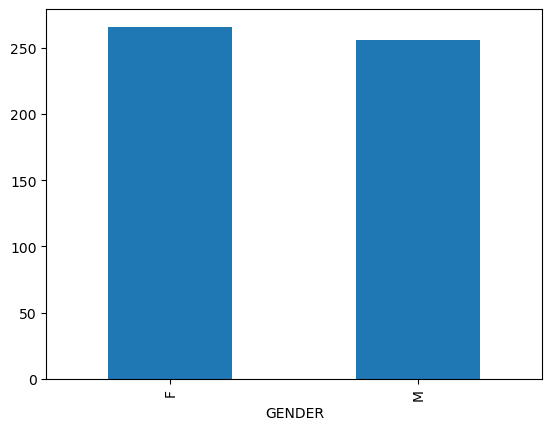

In [118]:
import matplotlib.pyplot as plt  

# Assuming your DataFrame is named df24 and it has a column 'SEX'  
df25['GENDER'].value_counts().plot(kind='bar')  

# Display the plot  
plt.show()

###BAR PLOT

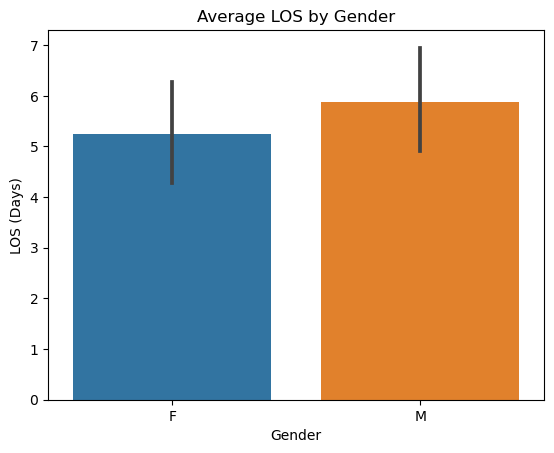

In [121]:

sns.barplot(x='GENDER',y='LOS',data=df25)
plt.title('Average LOS by Gender')  
plt.xlabel('Gender')  
plt.ylabel('LOS (Days)')  

plt.show() 

###HISTOGRAM

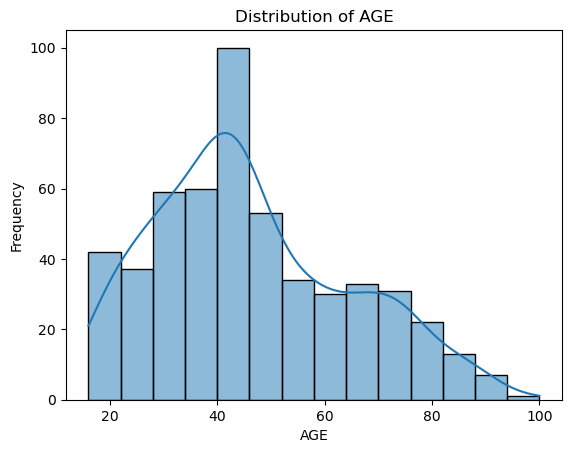

In [124]:
# Import necessary libraries  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Creating the histogram with KDE  
sns.histplot(df25['AGE'], kde=True)  

# Adding titles and labels for better understanding of the plot  
plt.title('Distribution of AGE')  
plt.xlabel('AGE')  
plt.ylabel('Frequency')  

# Display the plot  
plt.show()


###PROBABILITY PLOT

<Figure size 640x480 with 0 Axes>

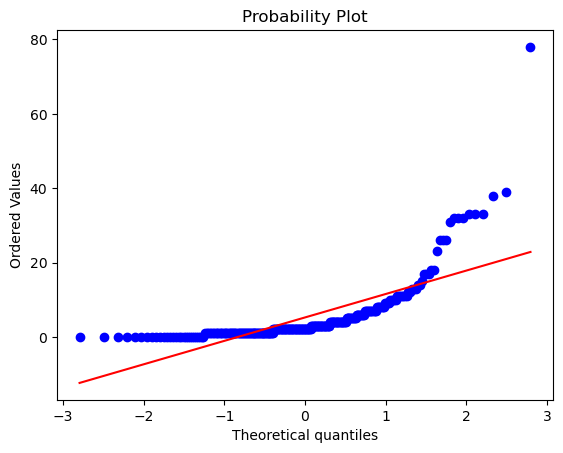

<Figure size 640x480 with 0 Axes>

In [127]:
stats.probplot(df25[df25['GENDER'] == 'F']['LOS'],plot=plt)
plt.figure()

##DATA ANALYSIS

###SHAPIRO TEST FOR FEMALE SUBGROUP

In [132]:
from scipy.stats import shapiro    #library needed to calculate SHAPIRO TEST
df25_female

# Perform Shapiro-Wilk test on the 'Value' column  
stat, p_value = shapiro(df25_female['LOS'])  

print('Statistics=%.3f, p-value=%.3f' % (stat, p_value))  

# Interpret the p-value  
alpha = 0.05  # Significance level  
if p_value > alpha:  
    print('Sample looks Gaussian (fail to reject H0)')  
else:  
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.566, p-value=0.000
Sample does not look Gaussian (reject H0)


###SHAPIRO TEST FOR MALE SUBGROUP

In [135]:

df25_male  

# Perform Shapiro-Wilk test on the 'Value' column  
stat, p_value = shapiro(df25_male['LOS'])  

print('Statistics=%.3f, p-value=%.3f' % (stat, p_value))  

# Interpret the p-value  
alpha = 0.05  # Significance level  
if p_value > alpha:  
    print('Sample looks Gaussian (fail to reject H0)')  
else:  
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.632, p-value=0.000
Sample does not look Gaussian (reject H0)


###MANNWHITNEY U TEST 

In [139]:
import numpy as np  
from scipy.stats import mannwhitneyu  

# Sample data for two groups  
group1= df25_female['LOS']
group2= df25_male['LOS']  

# Perform the Mann-Whitney U test  
U_statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')  

# Outputs  
print("U statistic:", U_statistic)  
print("p-value:", p_value)  

# Interpretation  
if p_value < 0.05:  
    print("There is a significant difference between the two groups.")  
else:  
    print("There is no significant difference between the two groups.")

U statistic: 31243.5
p-value: 0.10053706973553998
There is no significant difference between the two groups.


##INTERPRETATION OF RESULTS

The Hospital stay, also called length of stay,  was not significantly different between male and female patients in the second quarter of 2023 in the Department of Internal Medicine.

##DISSEMINATION OF THE NEW KNOWLEDGE

A written report on the findings and their interpretation was given to the stakeholders